<a href="https://colab.research.google.com/github/Tclack88/MountainProject/blob/master/rp_os_pyramids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redpoint/Onsight ladders

In [0]:
# Person being considered

# document = "https://www.mountainproject.com/user/109791883/trevor-clack/tick-export"
document = "https://www.mountainproject.com/user/110296901/morgan-f/tick-export"

In [0]:
import pandas as pd
import numpy as np
from math import floor
from datetime import datetime as dt
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(style='whitegrid')

In [0]:
# Get Grade for conversion (from Mountain Project's official grade converter)
grade_chart = pd.read_html("https://www.mountainproject.com/international-climbing-grades")
old_ropes = grade_chart[0].YDSUSA[:-1].to_list()
new_ropes = [0,0,0,0,1,2,3,4,5,6,7,7.4,8,8.4,8.8,9,9.4,9.8]+list(np.round(np.arange(10,16,.1),1))
ropes_convert = dict(zip(old_ropes,new_ropes))

In [0]:
# Supporting functions for clean and prep pipeline
def clean_grade(grade):
  grade = str(grade).split()[0]
  if grade[0] == '5':
    grade = ropes_convert[grade]
    return grade

def x_round(x):
  """ rounds down to nearest .25
  eg. x_round(11.49) = 11.25, x_round(11.51) = 11.5
  """
  if x >= 10:
    return floor(x*4)/4
  else: return x


# Rounding Key example:

# 10a, 10-, 10a/b  -> 10a
# 10b, 10          -> 10b
# 10b/c, 10c, 10+  -> 10c
# 10c/d, 10d       -> 10d

# def grade_to_number(grade):
#   letter_map = {'a':'.0', 'b':'.25', 'c':'.5', 'd':'.75', '-':'.0', '+':'.8'}
#   if grade[-1].isnumeric() == False:
#     grade = grade[:-1] + letter_map[grade[-1]]
#     print(grade)
#   else:
#     grade += '.4'
#     print(grade)


def grade_to_letter(grade):
  letter_map = {'.0':'a', '.25':'b', '.5':'c', '.75':'d'}
  letter_map_low = {'.0':'-', '.4':'', '.8':'+'}
  if grade >= 10:
    grade = str(grade)
    grade = grade[:2] + letter_map[grade[2:]]
    return grade
  else:
    grade = str(grade)
    grade = grade[:1] + letter_map_low[grade[1:]]
    return grade


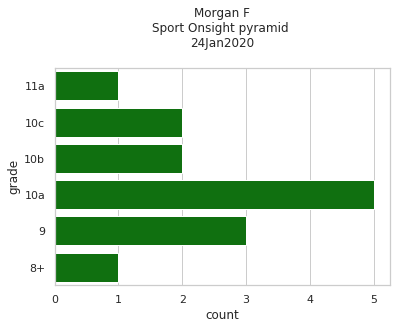

  grade  count
0   11a      1
1   10c      2
2   10b      2
3   10a      5
4     9      3
5    8+      1


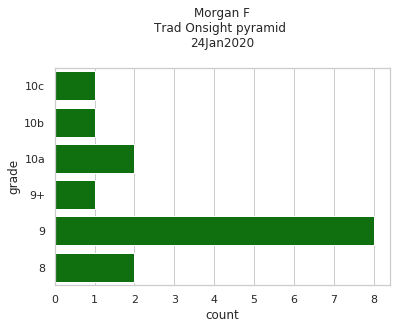

  grade  count
0   10c      1
1   10b      1
2   10a      2
3    9+      1
4     9      8
5     8      2


In [0]:
climber = document.split('/')[-2].replace('-',' ').title()
date = dt.now().strftime('%-d%b%Y')
data = pd.read_csv(document)
data = data[['Route', 'Rating', 'Style', 'Lead Style', 'Route Type']]
data = data.rename(columns = (dict(zip(data.columns,['route', 'grade', 'style', 'lead_style', 'type']))))
data.grade = data.grade.apply(clean_grade)
data = data[data['style'] == 'Lead']
# Split Trad and Sport data
trad = data[(data['type'] == 'Trad') | (data['type'] == 'Trad, Sport') | (data['type'] == 'Trad, Alpine') | (data['type'] == 'Trad, Aid')]
sport = data[(data['type'] == 'Sport') | (data['type'] == 'Sport, TR')]
trad_rp = trad[trad.lead_style == 'Redpoint']
trad_os = trad[trad.lead_style == 'Onsight']
trad_os.grade.apply(x_round).value_counts().sort_index(ascending=False)
sport_rp = sport[sport.lead_style == 'Redpoint']
sport_os = sport[sport.lead_style == 'Onsight']


styles = [sport_os, sport_rp, trad_os, trad_rp]

for style in styles:
  if not style.empty:
    title = f"{climber}\n{style.iloc[0]['type'].split(',')[0]} {style.iloc[0].lead_style} pyramid \n{date}\n"
    top_pyramid = style.grade.apply(x_round).value_counts().sort_index(ascending=False).iloc[:6].reset_index()
    top_pyramid.columns = ('grade','count')
    top_pyramid.grade = top_pyramid.grade.apply(grade_to_letter)
    sb.barplot(y='grade', x='count', data=top_pyramid, color='green')
    plt.title(title)
    plt.show()
    print(top_pyramid)



In [0]:
successful_climbs = data[(data.lead_style == 'Redpoint') | (data.lead_style =='Onsight')]
successful_climbs.grade = successful_climbs.grade.apply(lambda x: grade_to_letter(x_round(x)))
successful_climbs_stack = successful_climbs[['grade','route']]
successful_climbs_stack

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,grade,route
1,10a,Little Red Book
2,10a,Easy Prey
3,11a,Hole In One
4,10a,Dream of Wild Turkeys
5,10b,Stolen Chimney
18,9,Crooked Dick Spire
19,10a,Holey Moley
24,10b,Ants Go Marching
27,9,Crag Rat
28,9,The Squamish Butt Face


## Combined redpoint and os pyramid

In [0]:
def make_pyramid(document):
  climber = document.split('/')[-2].replace('-',' ').title()
  date = dt.now().strftime('%-d%b%Y')
  data = pd.read_csv(document)
  data = data[['Route', 'Rating', 'Style', 'Lead Style', 'Route Type']]
  data = data.rename(columns = (dict(zip(data.columns,['route', 'grade', 'style', 'lead_style', 'type']))))
  data.grade = data.grade.apply(clean_grade)
  data = data[data['style'] == 'Lead']
  # Split Trad and Sport data
  trad = data[(data['type'] == 'Trad') | (data['type'] == 'Trad, Sport') | (data['type'] == 'Trad, Alpine') | (data['type'] == 'Trad, Aid')]
  sport = data[(data['type'] == 'Sport') | (data['type'] == 'Sport, TR')]
  trad_rp = trad[trad.lead_style == 'Redpoint']
  trad_os = trad[trad.lead_style == 'Onsight']
  trad_os.grade.apply(x_round).value_counts().sort_index(ascending=False)
  sport_rp = sport[sport.lead_style == 'Redpoint']
  sport_os = sport[sport.lead_style == 'Onsight']

  sport_combined = pd.concat([sport_rp,sport_os], axis=0)
  trad_combined = pd.concat([trad_rp, trad_os], axis=0)
  styles = [sport_combined, trad_combined]

  pyramids = []
  for style in styles:
    if not style.empty:
      title = f"{climber}\n{style.iloc[0]['type'].split(',')[0]} pyramid \n as of {date}\n"
      top_pyramid = style.grade.apply(x_round).value_counts().sort_index(ascending=False).iloc[:6].reset_index()
      top_pyramid.columns = ('grade','count')
      top_pyramid.grade = top_pyramid.grade.apply(grade_to_letter)
      sb.barplot(y='grade', x='count', data=top_pyramid, color='green')
      plt.title(title)
      plt.show()
      print(top_pyramid)
      print('\n\n\t\ttop 10')
      print(style.sort_values('grade',ascending=False).head(10))
      pyramids.append(top_pyramid)

  return pyramids

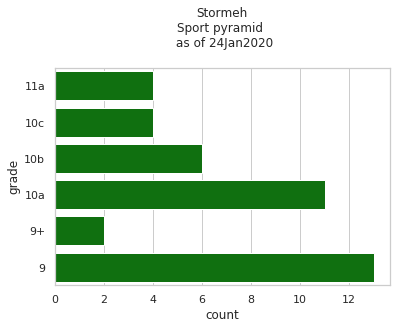

  grade  count
0   11a      4
1   10c      4
2   10b      6
3   10a     11
4    9+      2
5     9     13


		top 10
               route  grade style lead_style   type
6       Agent Orange   11.2  Lead   Redpoint  Sport
122              Pop   11.0  Lead   Redpoint  Sport
125   Dihedral Dance   11.0  Lead    Onsight  Sport
96     Totally Clips   11.0  Lead    Onsight  Sport
131      Blue Collar   10.6  Lead    Onsight  Sport
126  Blockade Runner   10.6  Lead    Onsight  Sport
89           Slacker   10.6  Lead    Onsight  Sport
8         False Flag   10.5  Lead    Onsight  Sport
88            Hubble   10.3  Lead    Onsight  Sport
18            Moucha   10.3  Lead    Onsight  Sport


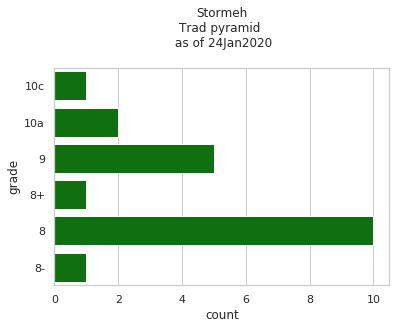

  grade  count
0   10c      1
1   10a      2
2     9      5
3    8+      1
4     8     10
5    8-      1


		top 10
                     route  grade style lead_style  type
41   The Squamish Buttress   10.6  Lead    Onsight  Trad
97              Panty Raid   10.0  Lead    Onsight  Trad
45             Pearly Gate   10.0  Lead    Onsight  Trad
145              The Horse    9.4  Lead    Onsight  Trad
4     Tales from the Crypt    9.4  Lead    Onsight  Trad
107         Ashtar Command    9.4  Lead    Onsight  Trad
39        St. Vitus' Dance    9.4  Lead    Onsight  Trad
43            Cold Comfort    9.4  Lead    Onsight  Trad
87            Vorpal Sword    8.8  Lead    Onsight  Trad
72                Planet X    8.4  Lead    Onsight  Trad


In [0]:
# document = "https://www.mountainproject.com/user/109791883/trevor-clack/tick-export"   # Trevor
# document = "https://www.mountainproject.com/user/110296901/morgan-f/tick-export"  # Morgan
document = "https://www.mountainproject.com/user/106234022/stormeh/tick-export" # Ryan Murphy

sport_pyramid, trad_pyramid = make_pyramid(document)

## Make suggestions to "fill out" pyramid

In [0]:
# pros are usually 1, 3, 20, 50, 100 (based on 8a.nu)
# intermediate maybe 1, 3, 10, 20, 30
# 1 2 4 8 12 seems reasonable for a beginner


sport_pyramid

,grade,count
0,11a,4
1,10c,4
2,10b,6
3,10a,11
4,9+,2
5,9,13


In [0]:
grades_list = '0 1 2 3 4 5 6 7 7+ 8- 8 8+ 9- 9 9+'.split()

numbs = '10 11 12 13 14 15'.split()
letters =  list('abcd')
for i in numbs:
  for j in letters:
    grades_list.append(i+j)

def suggest_pyramid(pyramid):
  scheme = [1,2,4,8,12] # may need to pass in later or set as "class global"
  print(pyramid.copy().iloc[0].grade)
  top_index = grades_list.index(pyramid.grade[0]) + 1

  user_grade_count_dict = dict(zip(pyramid.grade, pyramid['count']))
  top_5_grades = grades_list[top_index : top_index - 5 : -1]
  top_5_count = [ user_grade_count_dict.get(grade,0) for grade in top_5_grades] # 2nd argument in .get() gives value to be returned if non-existent

  pyramid_copy = pd.DataFrame(zip(top_5_grades, top_5_count), columns = ['grade','count']).iloc[:5]
  pyramid_copy['ideal_count'] = scheme
  pyramid_copy['todo'] = pyramid_copy.ideal_count - pyramid_copy['count']
  pyramid_copy.todo = pyramid_copy.todo.apply(lambda x: 0 if (x < 1) else x) # negative numbers -> 0 
  print(pyramid_copy)
  return pyramid_copy

In [0]:
suggested_pyramid = suggest_pyramid(sport_pyramid)

11a
  grade  count  ideal_count  todo
0   11b      0            1     1
1   11a      4            2     0
2   10d      0            4     4
3   10c      4            8     4
4   10b      6           12     6


In [0]:
## Scraping to make recommendations
url  = "https://www.mountainproject.com/area/classics/105865045/new-jack-city"
url = "https://www.mountainproject.com/area/classics/108189726/fairview-mountain"
import pandas as pd
import numpy as np
table = pd.read_html(url)[1]
table = table[table.Difficulty.str.startswith('5.')]
# grades
grades = table.Difficulty.apply(lambda x: x.split()[0])
grades = grades.apply(lambda x: x_round(ropes_convert[x])).apply(grade_to_letter) # remove V grades, convert to simplified letter grades
# routes
routes = table['Route Name'].apply(lambda x: ' '.join(x.split()[1:]))
# putting them together
recommendations_dict = {'grade':grades, 'route':routes}
recommendations_df = pd.DataFrame(recommendations_dict)

###################################################
#TEMP - make global/classvariable: assume we have user's 5 sought after grades: 
top_index = grades_list.index(sport_pyramid.grade[0]) + 1
user_grade_count_dict = dict(zip(sport_pyramid.grade, sport_pyramid['count']))
top_5_grades = grades_list[top_index : top_index - 5 : -1] # list of top grades as string
top_5_count = [ user_grade_count_dict.get(grade,0) for grade in top_5_grades] # 2nd argument in .get() gives value to be returned if non-existent
###################################################

recommendations_df = recommendations_df[recommendations_df.route.isin(successful_climbs_stack.route) == False] # returns area classics that haven't been climbed
recommendations_df = recommendations_df[recommendations_df.grade.str.contains('|'.join(top_5_grades))][::-1].reset_index(drop=True) # returns the right grade range (| in the string will give an "or" effect)
recommendations_df[recommendations_df.grade.isin(suggested_pyramid[suggested_pyramid.todo > 0].grade)] # remove grades within the suggested range that have been "overclimbed"

,grade,route
0,11b,Clone Army
6,10d,Light Saber
7,10d,Stretch Armstrong
8,10d,Jangofet
9,10d,Mojave Green
10,10c,Yoda
11,10c,Space Wrangler
12,10c,Sidewinder
13,10c,Black Dog
14,10c,False Flag


# Create Class

In [0]:
import pandas as pd
import numpy as np
from math import floor
from datetime import datetime as dt
import seaborn as sb
import matplotlib.pyplot as plt
sb.set(style='whitegrid')

class Pyramid:
  def __init__(self,document):
    self.document = document
    self.climber = document.split('/')[-2].replace('-',' ').title()
    self.grade_chart = pd.read_html("https://www.mountainproject.com/international-climbing-grades")
    self.old_ropes = self.grade_chart[0].YDSUSA[:-1].to_list()
    self.new_ropes = [0,0,0,0,1,2,3,4,5,6,7,7.4,8,8.4,8.8,9,9.4,9.8]+list(np.round(np.arange(10,16,.1),1))
    self.ropes_convert = dict(zip(self.old_ropes, self.new_ropes))
   
    self.data = self._clean_data(self.document)
    # Split Trad and Sport data
    self.trad = self.data[(self.data['type'] == 'Trad') | (self.data['type'] == 'Trad, Sport') | (self.data['type'] == 'Trad, Alpine') | (self.data['type'] == 'Trad, Aid')]
    self.sport = self.data[(self.data['type'] == 'Sport') | (self.data['type'] == 'Sport, TR')]
    self.trad_rp = self.trad[self.trad.lead_style == 'Redpoint']
    self.trad_os = self.trad[self.trad.lead_style == 'Onsight']
    self.trad_os.grade.apply(self._x_round).value_counts().sort_index(ascending=False)
    self.sport_rp = self.sport[self.sport.lead_style == 'Redpoint']
    self.sport_os = self.sport[self.sport.lead_style == 'Onsight']

    self.sport_combined = pd.concat([self.sport_rp,self.sport_os], axis=0)
    self.trad_combined = pd.concat([self.trad_rp, self.trad_os], axis=0)
    self.styles = [self.sport_combined, self.trad_combined]
    date = dt.now().strftime('%-d%b%Y')
    self.pyramids = []
    self.titles = []
    for i, style in enumerate(self.styles):
      if not style.empty:
        self.title = f"{self.climber}\n{style.iloc[0]['type'].split(',')[0]} pyramid \n as of {date}\n"
        self.top_pyramid = style.grade.apply(self._x_round).value_counts().sort_index(ascending=False).iloc[:6].reset_index()
        self.top_pyramid.columns = ('grade','count')
        self.top_pyramid.grade = self.top_pyramid.grade.apply(self._grade_to_letter)
        self.pyramids.append(self.top_pyramid)
        self.titles.append(self.title)
    
    self.sport_pyramid = self.pyramids[0]
    self.trad_pyramid = self.pyramids[1]

    self.grades_list = '0 1 2 3 4 5 6 7 7+ 8- 8 8+ 9- 9 9+'.split()
    self.numbs = '10 11 12 13 14 15'.split()
    self.letters =  list('abcd')
    for i in self.numbs:
      for j in self.letters:
        self.grades_list.append(i+j)

  # grade_chart = pd.read_html("https://www.mountainproject.com/international-climbing-grades")
  # old_ropes = grade_chart[0].YDSUSA[:-1].to_lcancelledtheist()
  # new_ropes = [0,0,0,0,1,2,3,4,5,6,7,7.4,8,8.4,8.8,9,9.4,9.8]+list(np.round(np.arange(10,16,.1),1))
  # ropes_convert = dict(zip(old_ropes,new_ropes))

  # @staticmethod
  def _clean_data(self,document):
    data = pd.read_csv(document)
    data = data[['Route', 'Rating', 'Style', 'Lead Style', 'Route Type']]
    data = data.rename(columns = (dict(zip(data.columns,['route', 'grade', 'style', 'lead_style', 'type']))))
    data.grade = data.grade.apply(self._clean_grade)
    data = data[data['style'] == 'Lead']
    return data

  # @staticmethod
  def _clean_grade(self, grade):
    grade = str(grade).split()[0]
    if grade[0] == '5':
      grade = self.ropes_convert[grade]
    return grade

  # @staticmethod
  def _x_round(self,x):
    """ rounds down to nearest .25
    eg. x_round(11.49) = 11.25, x_round(11.51) = 11.5
    """
    if x >= 10:
      return floor(x*4)/4
    return x

  # @staticmethod
  def _grade_to_letter(self, grade):
    letter_map = {'.0':'a', '.25':'b', '.5':'c', '.75':'d'}
    letter_map_low = {'.0':'-', '.4':'', '.8':'+'}
    grade = float(grade) # ensure eg. 7 is 7.0 for proper mapping
    if grade >= 10:
      grade = str(grade)
      grade = grade[:2] + letter_map[grade[2:]]
      return grade
    else:
      grade = str(grade)
      grade = grade[:1] + letter_map_low[grade[1:]]
      return grade

    
  # Rounding Key example:

  # 10a, 10-, 10a/b  -> 10a
  # 10b, 10          -> 10b
  # 10b/c, 10c, 10+  -> 10c
  # 10c/d, 10d       -> 10d

  def _grade_to_number(self, grade):
    letter_map = {'a':'.0', 'b':'.25', 'c':'.5', 'd':'.75', '-':'.0', '+':'.8'}
    if grade[-1].isnumeric() == False:
      grade = grade[:-1] + letter_map[grade[-1]]
      print(grade)
    else:
      grade += '.4'
      print(grade)


# TODO: make "none" a default argument, if none, return all (boulder maybe in future)
# otherwise return sport, trad, etc. if 'sport' or 'trad' is included
  def show_pyramids(self,pyramid_style='sport'):
    if pyramid_style == 'sport':
      self.style = self.styles[0]
      self.top_pyramid = self.pyramids[0]
      self.title = self.titles[0]
    elif pyramid_style == 'trad':
      self.style = self.styles[1]
      self.top_pyramid = self.pyramids[1]
      self.title = self.titles[1]
    sb.barplot(y='grade', x='count', data=self.top_pyramid, color='green')
    plt.title(self.title)
    plt.show()
    print(self.top_pyramid)
    print('\n\n\t\ttop 10')
    print(self.style.sort_values('grade',ascending=False).head(10))
    return None # I think I want none because I just want to display pyarmids for now. Else return self.pyramids


# TODO: run show_pyramid first to establish trad or sport pyramid or.... pull stuff out of show_pyramid first into __init__ 
# making show_pyramids into something smaller. REASON: show_pyramids has to be called before suggest_pyramid because it establishes
# what self.sport_pyramid and self.trad_pyramid are
  def suggest_pyramid(self, pyramid_style='sport'):
    if pyramid_style == 'sport':
      self.pyramid = self.sport_pyramid
    elif pyramid_style == 'trad':
      self.pyramid = self.trad_pyramid
    # else:
    #   print('perform method "show_pyramid" first')
    #   return None
    self.scheme = [1,2,4,8,12] # may need to pass in later or set as "class global"
    
    self.top_index = self.grades_list.index(self.pyramid.grade[0]) + 1
    self.user_grade_count_dict = dict(zip(self.pyramid.grade, self.pyramid['count']))
    self.top_5_grades = self.grades_list[self.top_index : self.top_index - 5 : -1]
    self.top_5_count = [ self.user_grade_count_dict.get(grade,0) for grade in self.top_5_grades] # 2nd argument in .get() gives value to be returned if non-existent

    self.pyramid_copy = pd.DataFrame(zip(self.top_5_grades, self.top_5_count), columns = ['grade','count']).iloc[:5]
    self.pyramid_copy['ideal_count'] = self.scheme
    self.pyramid_copy['todo'] = self.pyramid_copy.ideal_count - self.pyramid_copy['count']
    self.pyramid_copy.todo = self.pyramid_copy.todo.apply(lambda x: 0 if (x < 1) else x) # negative numbers -> 0 
    return self.pyramid_copy

  def make_recommendations(self, area_url, pyramid_style='sport'):
    self.table = pd.read_html(area_url)[1]
    self.table = self.table[self.table.Difficulty.str.startswith('5.')]
    # grades
    self.grades = self.table.Difficulty.apply(lambda x: x.split()[0])
    self.grades = self.grades.apply(lambda x: self._x_round(self.ropes_convert[x])).apply(self._grade_to_letter) # remove V grades, convert to simplified letter grades
    # routes
    self.routes = self.table['Route Name'].apply(lambda x: ' '.join(x.split()[1:]))
    # putting them together
    self.recommendations_dict = {'grade':self.grades, 'route':self.routes}
    self.recommendations_df = pd.DataFrame(self.recommendations_dict)
    ########### redundant in "suggest_pyramids" method, consider making global#########
    self.top_index = self.grades_list.index(self.sport_pyramid.grade[0]) + 1
    self.user_grade_count_dict = dict(zip(self.sport_pyramid.grade, self.sport_pyramid['count']))
    self.top_5_grades = self.grades_list[self.top_index : self.top_index - 5 : -1] # list of top grades as string
    self.top_5_count = [ self.user_grade_count_dict.get(grade,0) for grade in self.top_5_grades] # 2nd argument in .get() gives value to be returned if non-existent
    ###################################################################################
    #another add in ##
    self.successful_climbs = self.data[(self.data.lead_style == 'Redpoint') | (self.data.lead_style =='Onsight')]
    self.successful_climbs.grade = self.successful_climbs.grade.apply(lambda x: self._grade_to_letter(self._x_round(x)))
    self.successful_climbs_stack = self.successful_climbs[['grade','route']]
    # successful_climbs_stack
    #end add in
    self.suggested_pyramid = self.suggest_pyramid(pyramid_style)
    self.recommendations_df = self.recommendations_df[self.recommendations_df.route.isin(self.successful_climbs_stack.route) == False] # returns area classics that haven't been climbed
    self.recommendations_df = self.recommendations_df[self.recommendations_df.grade.str.contains('|'.join(self.top_5_grades))][::-1].reset_index(drop=True) # returns the right grade range (| in the string will give an "or" effect)
    self.recommendations_df[self.recommendations_df.grade.isin(self.suggested_pyramid[self.suggested_pyramid.todo > 0].grade)] # remove grades within the suggested range that have been "overclimbed"
    # print(recommendations_df)
    return self.recommendations_df

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


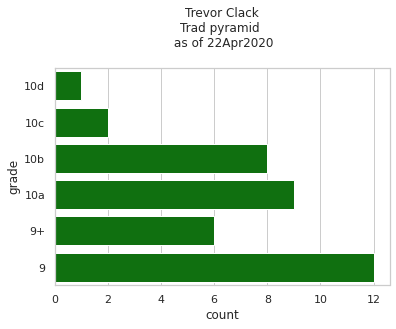

  grade  count
0   10d      1
1   10c      2
2   10b      8
3   10a      9
4    9+      6
5     9     12


		top 10
                                  route grade style lead_style       type
185                           Two Timer  10.9  Lead    Onsight       Trad
178                 Heart of the Desert  10.6  Lead    Onsight       Trad
200                     Amaretto Corner  10.5  Lead    Onsight       Trad
206                            Jojobean  10.4  Lead    Onsight       Trad
183  Unnamed II (fingers through fists)  10.4  Lead    Onsight       Trad
171                      Stolen Chimney  10.4  Lead    Onsight  Trad, Aid
199                           3AM Crack  10.4  Lead    Onsight       Trad
202            Supercrack of the Desert  10.4  Lead    Onsight       Trad
204                           Manifesto  10.4  Lead    Onsight       Trad
192                           Bar fight  10.4  Lead    Onsight       Trad


In [17]:
document = "https://www.mountainproject.com/user/109791883/trevor-clack/tick-export"   # Trevor
# document = "https://www.mountainproject.com/user/110296901/morgan-f/tick-export"  # Morgan
# document = "https://www.mountainproject.com/user/106234022/stormeh/tick-export" # Ryan Murphy
# area_url = "https://www.mountainproject.com/area/classics/108189726/fairview-mountain"
area_url = "https://www.mountainproject.com/area/classics/105931166/central-pinnacles"
P = Pyramid(document)
P.make_recommendations(area_url)
P.show_pyramids('trad')

# TODO: fix the show_pyramids, with 'None' it shows one then doesn't show the other

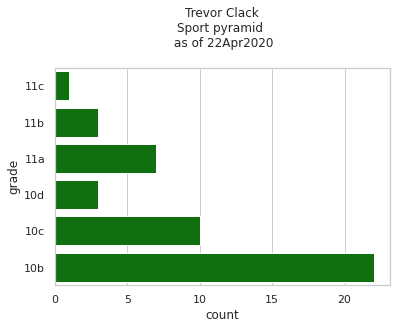

  grade  count
0   11c      1
1   11b      3
2   11a      7
3   10d      3
4   10c     10
5   10b     22


		top 10
                       route grade style lead_style   type
5               Lean Cuisine  11.6  Lead   Redpoint  Sport
58   This Nazi Shit Won't Do  11.3  Lead   Redpoint  Sport
225                 Sun Dogs  11.3  Lead    Onsight  Sport
224            Space Cowboys  11.3  Lead    Onsight  Sport
50              Agent Orange  11.2  Lead   Redpoint  Sport
211              Jack Jumped    11  Lead   Redpoint  Sport
54               Dark Matter    11  Lead    Onsight  Sport
226         Starship Trooper    11  Lead    Onsight  Sport
43               Light Saber    11  Lead    Onsight  Sport
16        Internet Superstar    11  Lead   Redpoint  Sport


In [18]:
P.show_pyramids('sport')

### OVERLAP

In [0]:
trevor_doc = "https://www.mountainproject.com/user/109791883/trevor-clack/tick-export"   # Trevor
morgan_doc = "https://www.mountainproject.com/user/110296901/morgan-f/tick-export"  # Morgan
ryan_doc = "https://www.mountainproject.com/user/106234022/stormeh/tick-export" # Ryan Murphy
P_ryan = Pyramid(ryan_doc)
P_trevor = Pyramid(trevor_doc)
P_morgan = Pyramid(morgan_doc)


In [0]:
url = "https://www.mountainproject.com/area/classics/108189726/fairview-mountain"
t_rec = P_trevor.make_recommendations(url)
r_rec = P_ryan.make_recommendations(url)
m_rec = P_morgan.make_recommendations(url)


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [0]:
# Merging the "todos" of everyone will find the area classics no one has done but "need to do" in order to fill their pyramids
t_rec.merge(m_rec).merge(r_rec)
# P_trevor.suggest_pyramid()

,grade,route
0,11b,Clone Army
1,11a,High Desert Hospitality
2,11a,Internet Superstar
3,11a,Little Fighter
4,11a,Hangnail
5,11a,Solar Warrior Dynasty
6,10d,Stretch Armstrong
7,10d,Size Matters Not
8,10d,Jangofet
9,10d,A New Hope/Knockin on .11's…
